<a href="https://colab.research.google.com/github/Anonymous3017/AI-ML-Training/blob/main/Day_12_Ayush_Track_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/diabetes.csv')
df = pd.DataFrame(data)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
x=df.drop("Outcome",axis=1)
y=df.Outcome

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

In [ ]:
x_train.shape, x_test.shape

((576, 8), (192, 8))

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_proba = lr.predict_proba(x_test)[:,1]

In [ ]:
y_proba

array([0.27188698, 0.19244283, 0.11082721, 0.14509574, 0.48339803,
       0.44925725, 0.01399671, 0.61240623, 0.56720017, 0.7887707 ,
       0.25730165, 0.91357712, 0.36920879, 0.27336807, 0.07178568,
       0.36705481, 0.13340498, 0.07065251, 0.86945867, 0.57210287,
       0.20546805, 0.07549018, 0.54384987, 0.0925546 , 0.55113964,
       0.89899446, 0.12268686, 0.03037443, 0.26116105, 0.10829824,
       0.91659852, 0.87244586, 0.80256616, 0.82231149, 0.59277091,
       0.68514611, 0.974592  , 0.2321236 , 0.51502826, 0.71785979,
       0.06537242, 0.58233733, 0.57510767, 0.30347312, 0.02664864,
       0.51798718, 0.61516627, 0.21613412, 0.33345337, 0.95879552,
       0.04742526, 0.67121554, 0.82727897, 0.23791729, 0.10174143,
       0.03875094, 0.79196207, 0.00491136, 0.39227111, 0.77237861,
       0.75294057, 0.3526574 , 0.20421696, 0.18240312, 0.0768971 ,
       0.65018184, 0.04718636, 0.74254867, 0.03419493, 0.75401995,
       0.69305863, 0.06678509, 0.17243136, 0.11385935, 0.08624

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
fpr,tpr,thresh=roc_curve(y_test,y_proba)

In [ ]:
#plot
from plotly import graph_objects as go

In [ ]:
# Trace 0
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode="lines",
    name="ROC Curve"
)

# Highlight every 10th point as threshold
n = 10
indices = np.arange(len(thresh)) % n == 0

# Trace 1
trace1 = go.Scatter(
    x=fpr[indices],
    y=tpr[indices],
    mode="markers+text",
    name="Threshold Points",
    text=[f"Threshold: {t:.2f}" for t in thresh[indices]],
    textposition="top center"
)

# Trace 2
trace2 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode="lines",
    name="Area: 0.5",
    line=dict(dash="dash")
)

trace_data = [trace0, trace1, trace2]

# Layout
layout = go.Layout(
    title="ROC Curve",
    xaxis=dict(title="False Positive Rate"),
    yaxis=dict(title="True Positive Rate"),
    width=800,
    height=800
)

fig = go.Figure(data=trace_data, layout=layout)
fig.show()

In [ ]:
idx = np.argmax(tpr - fpr)
thresh[idx]

0.6151662702572657

In [ ]:
fpr,tpr,thresh = roc_curve(y_test,y_proba)

#roc_auc
roc_auc = roc_auc_score(y_test,y_proba)

# Trace 0
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode="lines",
    name=f"ROC curve ( area : {roc_auc:.2f})"
)

# Highlight every 10th point as threshold
n = 10
indices = np.arange(len(thresh)) % n == 0

# Trace 1
trace1 = go.Scatter(
    x=fpr[indices],
    y=tpr[indices],
    mode="markers+text",
    name="Threshold Points",
    text=[f"Threshold: {t:.2f}" for t in thresh[indices]],
    textposition="top center"
)

# Trace 2
trace2 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode="lines",
    name="Area: 0.5",
    line=dict(dash="dash")
)

trace_data = [trace0, trace1, trace2]

# Layout
layout = go.Layout(
    title="ROC Curve",
    xaxis=dict(title="False Positive Rate"),
    yaxis=dict(title="True Positive Rate"),
    width=800,
    height=800
)

fig = go.Figure(data=trace_data, layout=layout)
fig.show()



# SVM

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', probability=True)
clf.fit(x_train,y_train)

SVC(kernel='linear', probability=True)

In [ ]:
y_proba = clf.predict_proba(x_test)[:,1]

In [ ]:
fpr,tpr,thresh=roc_curve(y_test,y_proba)

In [ ]:
idx = np.argmax(tpr - fpr)
thresh[idx]

0.5538228565833103

In [ ]:
fpr,tpr,thresh = roc_curve(y_test,y_proba)

#roc_auc
roc_auc = roc_auc_score(y_test,y_proba)

# Trace 0
trace0 = go.Scatter(
    x=fpr,
    y=tpr,
    mode="lines",
    name=f"ROC curve ( area : {roc_auc:.2f})"
)

# Highlight every 10th point as threshold
n = 10
indices = np.arange(len(thresh)) % n == 0

# Trace 1
trace1 = go.Scatter(
    x=fpr[indices],
    y=tpr[indices],
    mode="markers+text",
    name="Threshold Points",
    text=[f"Threshold: {t:.2f}" for t in thresh[indices]],
    textposition="top center"
)

# Trace 2
trace2 = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode="lines",
    name="Area: 0.5",
    line=dict(dash="dash")
)

trace_data = [trace0, trace1, trace2]

# Layout
layout = go.Layout(
    title="ROC Curve",
    xaxis=dict(title="False Positive Rate"),
    yaxis=dict(title="True Positive Rate"),
    width=800,
    height=800
)

fig = go.Figure(data=trace_data, layout=layout)
fig.show()



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import plotly.graph_objs as go
import numpy as np

# Assuming you have y_test1, y_proba1, y_test2, and y_proba2 defined earlier

# Calculate ROC curve and ROC AUC for the first set of predictions
fpr1, tpr1, thresh1 = roc_curve(y_test, y_proba)
roc_auc1 = roc_auc_score(y_test, y_proba)

# Calculate ROC curve and ROC AUC for the second set of predictions
fpr2, tpr2, thresh2 = roc_curve(y_test, y_proba)
roc_auc2 = roc_auc_score(y_test, y_proba)

trace0 = go.Scatter(
    x=fpr1,
    y=tpr1,
    mode='lines',
    name=f"ROC curve 1 (area: {roc_auc1:.2f})"
)

trace1 = go.Scatter(
    x=fpr2,
    y=tpr2,
    mode='lines',
    name=f"ROC curve 2 (area: {roc_auc2:.2f})"
)

layout = go.Layout(
    title='ROC Curves',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    width=800,
    height=800,
)

fig = go.Figure(data=[trace0, trace1], layout=layout)
fig.show()

In [ ]:
store = pd.read_csv('/content/store_data.csv',header=None)
store.shape

(7501, 20)

In [ ]:
!pip install apyori
from apyori import apriori

In [ ]:
store.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
records=[]
for i in range(7501):
  t=[]
  for j in range(20):
    t.append(str(store.values[i,j]))
  records.append(t)

In [ ]:
records

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
 

In [ ]:
# records=[  for j inrange(20) for i in range(7501)]
# for i in range(7501):
#   t=[]
#   for j in range(20):
#     t.append(str(store.values[i,j]))
#   records.append(t)

In [ ]:
association = list(apriori(records,min_support=0.004,min_lift=3,min_confidence=0.2,max_length=2))

In [ ]:
association[0][2][0][3]

4.84395061728395

In [ ]:
association
#item set
#confidence
# support
# lift



[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'ground beef', 'herb & pepper'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), 

In [ ]:
for rule in association:
    print("Association Rule:", rule)

Association Rule: RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])
Association Rule: RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)])
Association Rule: RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)])
Association Rule: RelationRecord(items=frozenset({'ground beef', 'herb & pepper'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=fro

In [ ]:
for rule in association:
       support = rule.support
       confidence = rule.ordered_statistics[0].confidence
       lift = rule.ordered_statistics[0].lift
       print("Association Rule:", rule.items)
       print("Support:", support)
       print("Confidence:", confidence)
       print("Lift:", lift)
       print()

Association Rule: frozenset({'light cream', 'chicken'})
Support: 0.004532728969470737
Confidence: 0.29059829059829057
Lift: 4.84395061728395

Association Rule: frozenset({'mushroom cream sauce', 'escalope'})
Support: 0.005732568990801226
Confidence: 0.3006993006993007
Lift: 3.790832696715049

Association Rule: frozenset({'pasta', 'escalope'})
Support: 0.005865884548726837
Confidence: 0.3728813559322034
Lift: 4.700811850163794

Association Rule: frozenset({'ground beef', 'herb & pepper'})
Support: 0.015997866951073192
Confidence: 0.3234501347708895
Lift: 3.2919938411349285

Association Rule: frozenset({'ground beef', 'tomato sauce'})
Support: 0.005332622317024397
Confidence: 0.3773584905660377
Lift: 3.840659481324083

Association Rule: frozenset({'whole wheat pasta', 'olive oil'})
Support: 0.007998933475536596
Confidence: 0.2714932126696833
Lift: 4.122410097642296

Association Rule: frozenset({'shrimp', 'pasta'})
Support: 0.005065991201173177
Confidence: 0.3220338983050847
Lift: 4.50667

# Assesment

## Problem Statement: Principal Component Analysis (PCA)

Load the "vehicle.csv"dataset into a DataFrame and perform the following tasks:

1.Find   out   the   null   values   in   the   DataFrame   and   drop   them   using dropna()function

2.Considering the "class"column as the target variable/column, separate the target and the feature vectors

3.Scale the numeric data in the independent variables (Feature vectors) using the Standard scalar

4.Convert  the  independent  variables  into   2-D  data  using  PCA   (Principal Component Analysis)

5.Combine the target data with the 2-D independent data/feature vectors to create final DataFrame

6.Plot the final DataFrame using a scatter plot

7.Calculate the variance ratio of the 2-D data converted using PCA


In [ ]:
df = pd.read_csv('/content/vehicle_csv.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   COMPACTNESS                846 non-null    int64 
 1   CIRCULARITY                846 non-null    int64 
 2   DISTANCE_CIRCULARITY       846 non-null    int64 
 3   RADIUS_RATIO               846 non-null    int64 
 4   PR.AXIS_ASPECT_RATIO       846 non-null    int64 
 5   MAX.LENGTH_ASPECT_RATIO    846 non-null    int64 
 6   SCATTER_RATIO              846 non-null    int64 
 7   ELONGATEDNESS              846 non-null    int64 
 8   PR.AXIS_RECTANGULARITY     846 non-null    int64 
 9   MAX.LENGTH_RECTANGULARITY  846 non-null    int64 
 10  SCALED_VARIANCE_MAJOR      846 non-null    int64 
 11  SCALED_VARIANCE_MINOR      846 non-null    int64 
 12  SCALED_RADIUS_OF_GYRATION  846 non-null    int64 
 13  SKEWNESS_ABOUT_MAJOR       846 non-null    int64 
 14  SKEWNESS_A

In [ ]:
df.isna().sum()

COMPACTNESS                  0
CIRCULARITY                  0
DISTANCE_CIRCULARITY         0
RADIUS_RATIO                 0
PR.AXIS_ASPECT_RATIO         0
MAX.LENGTH_ASPECT_RATIO      0
SCATTER_RATIO                0
ELONGATEDNESS                0
PR.AXIS_RECTANGULARITY       0
MAX.LENGTH_RECTANGULARITY    0
SCALED_VARIANCE_MAJOR        0
SCALED_VARIANCE_MINOR        0
SCALED_RADIUS_OF_GYRATION    0
SKEWNESS_ABOUT_MAJOR         0
SKEWNESS_ABOUT_MINOR         0
KURTOSIS_ABOUT_MAJOR         0
KURTOSIS_ABOUT_MINOR         0
HOLLOWS_RATIO                0
Class                        0
dtype: int64

In [ ]:
df.isnull().sum()

COMPACTNESS                  0
CIRCULARITY                  0
DISTANCE_CIRCULARITY         0
RADIUS_RATIO                 0
PR.AXIS_ASPECT_RATIO         0
MAX.LENGTH_ASPECT_RATIO      0
SCATTER_RATIO                0
ELONGATEDNESS                0
PR.AXIS_RECTANGULARITY       0
MAX.LENGTH_RECTANGULARITY    0
SCALED_VARIANCE_MAJOR        0
SCALED_VARIANCE_MINOR        0
SCALED_RADIUS_OF_GYRATION    0
SKEWNESS_ABOUT_MAJOR         0
SKEWNESS_ABOUT_MINOR         0
KURTOSIS_ABOUT_MAJOR         0
KURTOSIS_ABOUT_MINOR         0
HOLLOWS_RATIO                0
Class                        0
dtype: int64

In [ ]:
df.columns

Index(['COMPACTNESS', 'CIRCULARITY', 'DISTANCE_CIRCULARITY', 'RADIUS_RATIO',
       'PR.AXIS_ASPECT_RATIO', 'MAX.LENGTH_ASPECT_RATIO', 'SCATTER_RATIO',
       'ELONGATEDNESS', 'PR.AXIS_RECTANGULARITY', 'MAX.LENGTH_RECTANGULARITY',
       'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR',
       'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MAJOR',
       'SKEWNESS_ABOUT_MINOR', 'KURTOSIS_ABOUT_MAJOR', 'KURTOSIS_ABOUT_MINOR',
       'HOLLOWS_RATIO', 'Class'],
      dtype='object')

In [ ]:
x = df.drop('Class',axis=1)
y = df['Class']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

scaler.fit(x)

scaled_x = scaler.transform(x)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [ ]:
pca.fit(scaled_x)

PCA(n_components=2)

In [ ]:
transformed_x = pca.transform(scaled_x)

In [ ]:
pc = pca.components_

In [ ]:
transformed_x.shape

(846, 2)

In [ ]:
combined_data = pd.DataFrame(transformed_x, columns=['PCA1','PCA2'])

In [ ]:
combined_data.head()

,PCA1,PCA2
0,0.330282,-0.214485
1,-1.594166,-0.422133
2,3.761281,0.188004
3,-1.742690,-2.823370
4,0.551323,4.768797


In [ ]:
combined_data.insert(2,column='target',value=y)
combined_data.head()

,PCA1,PCA2,target
0,0.330282,-0.214485,van
1,-1.594166,-0.422133,van
2,3.761281,0.188004,saab
3,-1.742690,-2.823370,van
4,0.551323,4.768797,bus


In [ ]:
combined_data.shape

(846, 3)

In [ ]:
import matplotlib.pyplot as plt

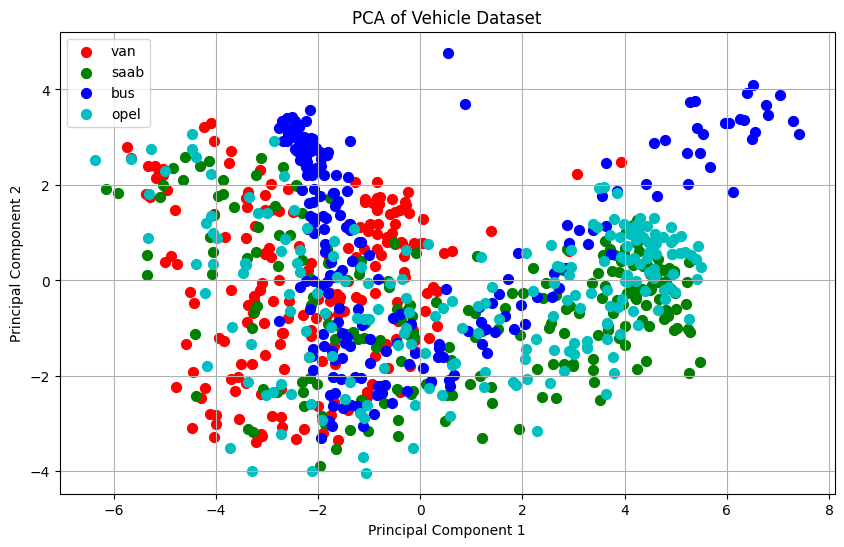

In [ ]:
plt.figure(figsize=(10, 6))
targets = combined_data['target'].unique()
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for target, color in zip(targets, colors):
    indices_to_keep = combined_data['target'] == target
    plt.scatter(combined_data.loc[indices_to_keep, 'PCA1'], combined_data.loc[indices_to_keep, 'PCA2'], c=color, s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(targets)
plt.title('PCA of Vehicle Dataset')
plt.grid()
plt.show()

## Problem Statement:Dimensionality Reduction

Write a Python program that reads the dairy_product.csv file into  a  DataFrame, the  following  are  the  tasks  that  are  to  be  taken  into consideration while reducing the dimensions of data.

1.Load the mobile dairy_product.csvdata into a DataFrame

2.Find missing valuesand drop columns having more than 80% missing data

3.Do label encoding for categorical features

4.Extract   independent   variables   (Xs)   and dependent   variables   (Ys)   into separate data objects and drop unwanted columns like “ID”

5.Print low-variancedata

6.Use random forestand print important features as per their value

7.Based  on the high  correlation,drop  highly  correlated  columns,as  you  canfind.

In [ ]:
Ddata = pd.read_csv('/content/dairy_product.csv')
df = pd.DataFrame(Ddata)

In [ ]:
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [ ]:
df.columns

Index(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'],
      dtype='object')

In [ ]:
df.shape

(8618, 45)

In [ ]:
df.isnull().sum()

ID                     0
FoodGroup              0
ShortDescrip           0
Descrip                0
CommonName          7555
MfgName             7058
ScientificName      7886
Energy_kcal            0
Protein_g              0
Fat_g                  0
Carb_g                 0
Sugar_g                0
Fiber_g                0
VitA_mcg               0
VitB6_mg               0
VitB12_mcg             0
VitC_mg                0
VitE_mg                0
Folate_mcg             0
Niacin_mg              0
Riboflavin_mg          0
Thiamin_mg             0
Calcium_mg             0
Copper_mcg             0
Iron_mg                0
Magnesium_mg           0
Manganese_mg           0
Phosphorus_mg          0
Selenium_mcg           0
Zinc_mg                0
VitA_USRDA             0
VitB6_USRDA            0
VitB12_USRDA           0
VitC_USRDA             0
VitE_USRDA             0
Folate_USRDA           0
Niacin_USRDA           0
Riboflavin_USRDA       0
Thiamin_USRDA          0
Calcium_USRDA          0


In [ ]:
df = df.drop(['ScientificName','MfgName','CommonName'],axis=1)

In [ ]:
df.isnull().sum()

ID                  0
FoodGroup           0
ShortDescrip        0
Descrip             0
Energy_kcal         0
Protein_g           0
Fat_g               0
Carb_g              0
Sugar_g             0
Fiber_g             0
VitA_mcg            0
VitB6_mg            0
VitB12_mcg          0
VitC_mg             0
VitE_mg             0
Folate_mcg          0
Niacin_mg           0
Riboflavin_mg       0
Thiamin_mg          0
Calcium_mg          0
Copper_mcg          0
Iron_mg             0
Magnesium_mg        0
Manganese_mg        0
Phosphorus_mg       0
Selenium_mcg        0
Zinc_mg             0
VitA_USRDA          0
VitB6_USRDA         0
VitB12_USRDA        0
VitC_USRDA          0
VitE_USRDA          0
Folate_USRDA        0
Niacin_USRDA        0
Riboflavin_USRDA    0
Thiamin_USRDA       0
Calcium_USRDA       0
Copper_USRDA        0
Magnesium_USRDA     0
Phosphorus_USRDA    0
Selenium_USRDA      0
Zinc_USRDA          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   Energy_kcal       8618 non-null   float64
 5   Protein_g         8618 non-null   float64
 6   Fat_g             8618 non-null   float64
 7   Carb_g            8618 non-null   float64
 8   Sugar_g           8618 non-null   float64
 9   Fiber_g           8618 non-null   float64
 10  VitA_mcg          8618 non-null   float64
 11  VitB6_mg          8618 non-null   float64
 12  VitB12_mcg        8618 non-null   float64
 13  VitC_mg           8618 non-null   float64
 14  VitE_mg           8618 non-null   float64
 15  Folate_mcg        8618 non-null   float64
 16  Niacin_mg         8618 non-null   float64


In [ ]:
df['FoodGroup'].value_counts()

Beef Products                          946
Vegetables and Vegetable Products      828
Baked Products                         797
Soups, Sauces, and Gravies             452
Lamb, Veal, and Game Products          438
Poultry Products                       390
Legumes and Legume Products            389
Fast Foods                             371
Breakfast Cereals                      363
Baby Foods                             362
Sweets                                 347
Fruits and Fruit Juices                346
Pork Products                          343
Beverages                              315
Finfish and Shellfish Products         267
Dairy and Egg Products                 264
Sausages and Luncheon Meats            244
Fats and Oils                          219
Cereal Grains and Pasta                183
Snacks                                 171
American Indian/Alaska Native Foods    165
Nut and Seed Products                  133
Meals, Entrees, and Side Dishes        113
Restaurant 

In [ ]:
df['Descrip'].value_counts()

Butter, salted                                                                   1
Muffins, corn, dry mix, prepared                                                 1
Pancakes, whole-wheat, dry mix, incomplete                                       1
Pancakes, special dietary, dry mix                                               1
Pancakes, buckwheat, dry mix, incomplete                                         1
                                                                                ..
Balsam-pear (bitter gourd), pods, raw                                            1
Balsam-pear (bitter gourd), leafy tips, cooked, boiled, drained, without salt    1
Balsam-pear (bitter gourd), leafy tips, raw                                      1
Asparagus, frozen, cooked, boiled, drained, without salt                         1
Turtle, green, raw                                                               1
Name: Descrip, Length: 8618, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
col = ['FoodGroup','Descrip','ShortDescrip']

In [ ]:
for columns in col:
  df[columns] = le.fit_transform(df[columns])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 42 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   int64  
 2   ShortDescrip      8618 non-null   int64  
 3   Descrip           8618 non-null   int64  
 4   Energy_kcal       8618 non-null   float64
 5   Protein_g         8618 non-null   float64
 6   Fat_g             8618 non-null   float64
 7   Carb_g            8618 non-null   float64
 8   Sugar_g           8618 non-null   float64
 9   Fiber_g           8618 non-null   float64
 10  VitA_mcg          8618 non-null   float64
 11  VitB6_mg          8618 non-null   float64
 12  VitB12_mcg        8618 non-null   float64
 13  VitC_mg           8618 non-null   float64
 14  VitE_mg           8618 non-null   float64
 15  Folate_mcg        8618 non-null   float64
 16  Niacin_mg         8618 non-null   float64


In [ ]:
df.drop('ID',axis=1,inplace = True)

In [ ]:
x = df.drop('FoodGroup',axis=1)
y = df['FoodGroup']

In [ ]:
len(x.columns)

40

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
variance_selector = VarianceThreshold(threshold=0.05)

In [ ]:
low_variance_features = variance_selector.fit_transform(x)

In [ ]:
x.shape

(8618, 40)

In [ ]:
low_variance_features.shape

(8618, 37)

In [ ]:
low_variance_mask = variance_selector.get_support()

In [ ]:
low_variance_feature_names = x.columns[low_variance_mask]

In [ ]:
list(x)

['ShortDescrip',
 'Descrip',
 'Energy_kcal',
 'Protein_g',
 'Fat_g',
 'Carb_g',
 'Sugar_g',
 'Fiber_g',
 'VitA_mcg',
 'VitB6_mg',
 'VitB12_mcg',
 'VitC_mg',
 'VitE_mg',
 'Folate_mcg',
 'Niacin_mg',
 'Riboflavin_mg',
 'Thiamin_mg',
 'Calcium_mg',
 'Copper_mcg',
 'Iron_mg',
 'Magnesium_mg',
 'Manganese_mg',
 'Phosphorus_mg',
 'Selenium_mcg',
 'Zinc_mg',
 'VitA_USRDA',
 'VitB6_USRDA',
 'VitB12_USRDA',
 'VitC_USRDA',
 'VitE_USRDA',
 'Folate_USRDA',
 'Niacin_USRDA',
 'Riboflavin_USRDA',
 'Thiamin_USRDA',
 'Calcium_USRDA',
 'Copper_USRDA',
 'Magnesium_USRDA',
 'Phosphorus_USRDA',
 'Selenium_USRDA',
 'Zinc_USRDA']

In [ ]:
list(low_variance_feature_names)

['ShortDescrip',
 'Descrip',
 'Energy_kcal',
 'Protein_g',
 'Fat_g',
 'Carb_g',
 'Sugar_g',
 'Fiber_g',
 'VitA_mcg',
 'VitB6_mg',
 'VitB12_mcg',
 'VitC_mg',
 'VitE_mg',
 'Folate_mcg',
 'Niacin_mg',
 'Riboflavin_mg',
 'Thiamin_mg',
 'Calcium_mg',
 'Copper_mcg',
 'Iron_mg',
 'Magnesium_mg',
 'Manganese_mg',
 'Phosphorus_mg',
 'Selenium_mcg',
 'Zinc_mg',
 'VitA_USRDA',
 'VitB6_USRDA',
 'VitB12_USRDA',
 'VitC_USRDA',
 'VitE_USRDA',
 'Folate_USRDA',
 'Niacin_USRDA',
 'Riboflavin_USRDA',
 'Thiamin_USRDA',
 'Phosphorus_USRDA',
 'Selenium_USRDA',
 'Zinc_USRDA']

In [ ]:
res_set = set(list(x)) - set(list(low_variance_feature_names) )

In [ ]:
res_lst = list(res_set)
print(f'columns with low variance which are removed are {res_lst}')

columns with low variance which are removed are ['Copper_USRDA', 'Calcium_USRDA', 'Magnesium_USRDA']


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42)

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
rf.feature_importances_

array([0.06867011, 0.084041  , 0.04067299, 0.04223549, 0.03682799,
       0.06720674, 0.02542017, 0.02641348, 0.01189947, 0.01818134,
       0.02699537, 0.02007313, 0.011693  , 0.01746027, 0.02185972,
       0.01465426, 0.02686061, 0.01867375, 0.01609955, 0.02573395,
       0.01747644, 0.02147254, 0.01627478, 0.0190027 , 0.02596629,
       0.01227777, 0.01858433, 0.02378558, 0.02074217, 0.01178146,
       0.01722869, 0.02146608, 0.01418773, 0.02565371, 0.01736422,
       0.01592158, 0.01856435, 0.0158422 , 0.01979672, 0.02493828])

In [ ]:
fi_df = pd.DataFrame({"features":x_train.columns,"Importance":rf.feature_importances_})
fi_df = fi_df.sort_values(by='Importance', ascending=False)
fi_df

,features,Importance
1,Descrip,0.084041
0,ShortDescrip,0.068670
5,Carb_g,0.067207
3,Protein_g,0.042235
2,Energy_kcal,0.040673
4,Fat_g,0.036828
10,VitB12_mcg,0.026995
16,Thiamin_mg,0.026861
7,Fiber_g,0.026413
24,Zinc_mg,0.025966


In [ ]:
accuracy_score(y_test,y_pred)

0.925754060324826

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
correlation_matrix = x.corr()

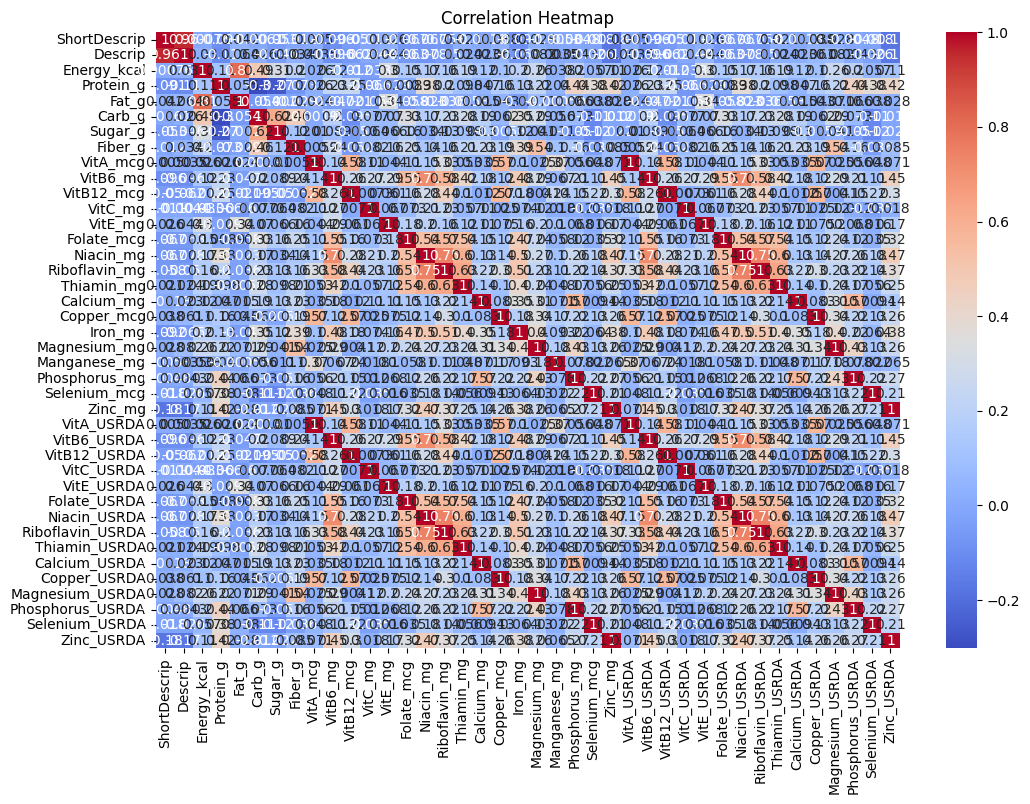

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap")
plt.show()

In [ ]:
correlation_threshold = 0.8

In [ ]:
highly_correlated_pairs = (correlation_matrix.abs() > correlation_threshold) & (correlation_matrix.abs() < 1)

In [ ]:
columns_to_drop = set()

In [ ]:
for col in highly_correlated_pairs:
    correlated_cols = highly_correlated_pairs.index[highly_correlated_pairs[col]].tolist()
    if correlated_cols:
        columns_to_drop.update(correlated_cols)

In [ ]:
columns_to_drop

{'Calcium_USRDA',
 'Calcium_mg',
 'Descrip',
 'Energy_kcal',
 'Fat_g',
 'Phosphorus_USRDA',
 'Phosphorus_mg',
 'Riboflavin_USRDA',
 'Riboflavin_mg',
 'ShortDescrip',
 'VitB12_USRDA',
 'VitB12_mcg',
 'VitB6_USRDA',
 'VitB6_mg',
 'Zinc_USRDA',
 'Zinc_mg'}

In [ ]:
columns_to_drop = list(columns_to_drop)

In [ ]:
df_filtered = df.drop(columns=columns_to_drop)

In [ ]:
df_filtered

,FoodGroup,Protein_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,...,Selenium_mcg,VitA_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Thiamin_USRDA,Copper_USRDA,Magnesium_USRDA,Selenium_USRDA
0,7,0.85,0.06,0.06,0.0,684.0,0.0,2.32,3.0,0.042,...,1.0,0.760000,0.0,0.154667,0.0075,0.002625,0.004167,0.000000,0.004762,0.018182
1,7,0.85,0.06,0.06,0.0,684.0,0.0,2.32,3.0,0.042,...,1.0,0.760000,0.0,0.154667,0.0075,0.002625,0.004167,0.000018,0.004762,0.018182
2,7,0.28,0.00,0.00,0.0,840.0,0.0,2.80,0.0,0.003,...,0.0,0.933333,0.0,0.186667,0.0000,0.000188,0.000833,0.000001,0.000000,0.000000
3,7,21.40,2.34,0.50,0.0,198.0,0.0,0.25,36.0,1.016,...,14.5,0.220000,0.0,0.016667,0.0900,0.063500,0.024167,0.000044,0.054762,0.263636
4,7,23.24,2.79,0.51,0.0,292.0,0.0,0.26,20.0,0.118,...,14.5,0.324444,0.0,0.017333,0.0500,0.007375,0.011667,0.000027,0.057143,0.263636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,10,18.50,0.00,0.00,0.0,47.0,0.0,2.38,15.0,3.300,...,73.4,0.052222,0.0,0.158667,0.0375,0.206250,0.016667,0.000111,0.142857,1.334545
8614,10,20.54,5.41,0.00,0.0,2.0,0.0,0.00,20.0,1.076,...,21.7,0.002222,0.0,0.000000,0.0500,0.067250,0.010000,0.000037,0.088095,0.394545
8615,23,0.00,73.14,73.20,0.0,0.0,0.0,0.00,0.0,0.100,...,0.7,0.000000,0.0,0.000000,0.0000,0.006250,0.108333,0.000022,0.023810,0.012727
8616,10,16.10,2.00,0.00,0.0,30.0,0.0,5.00,6.0,1.400,...,27.4,0.033333,0.0,0.333333,0.0150,0.087500,0.008333,0.000444,0.595238,0.498182


In [ ]:
x.shape, y.shape

((8618, 25), (8618,))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_scaled = scaler.fit_transform(x)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [ ]:
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_model.fit(X_train_lda, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test_lda)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


## Problem Statement: ROC, AUC, Precision, Recall, and F1 Score

Load the 'Breast_Cancer_Dataset.csv' dataset into a DataFrame and perform the following tasks:

1.Identify the null values and removethe null rows and columns by using the dropna()function

2.Considering  the 'diagnosis'column  as  the  target,  encodethe 'diagnosis'column using the LabelEncoder()

3.Separatethe target variable and the feature vectors

4.Splitthe dataset into the training set and test setin a 70:30 ratio

5.Building a Logistic Regression, Naive Bayes, Decision Tree (CART), K-NN, SVM, and RandomForestClassifier models; Also,print their accuracies

6.Calculatethe ROC_AUC score based on the False Positive Rate (FPR) and True Positive Rate (TPR)

7.Plot the ROC Curve using the Matplotlib library

8.Calculate the F1 Score

9.Calculateand   Print the   Precision,   Recall,   and   F1 score   using   the classification_report()function


In [ ]:
df = pd.read_csv('/content/Breast_Cancer_Dataset.csv')

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df.drop('Unnamed: 32',axis=1,inplace=True)

In [ ]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
from sklearn.preprocessing  import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
encoder.fit(df["diagnosis"])

LabelEncoder()

In [ ]:
df['diagnosis'] = encoder.transform(df["diagnosis"])

In [ ]:
df['diagnosis'].unique()

array([1, 0])

In [ ]:
x = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

In [ ]:
accuracies   = {}
for name, model in models.items():
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  accuracies[name] = accuracy

In [ ]:
for name, accuracy in accuracies.items():
  print(f"{name} accuracy: {accuracy:.2f}")

Logistic Regression accuracy: 0.63
Naive Bayes accuracy: 0.64
Decision Tree accuracy: 0.92
KNN accuracy: 0.71
SVM accuracy: 0.63
Random Forest accuracy: 0.96


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score, auc

In [ ]:
import plotly.graph_objects as go

In [ ]:
roc_auc_scores = {}
for name, model in models.items():
    model.fit(x_train, y_train)

    try:
        y_score = model.predict_proba(x_test)[:, 1]
    except AttributeError:
        # For classifiers without predict_proba, use decision_function
        y_score = model.decision_function(x_test)

    roc_auc = roc_auc_score(y_test, y_score)
    roc_auc_scores[name] = roc_auc

for name, roc_auc in roc_auc_scores.items():
    print(f"{name} ROC AUC Score: {roc_auc:.2f}")

Logistic Regression ROC AUC Score: 0.54
Naive Bayes ROC AUC Score: 0.94
Decision Tree ROC AUC Score: 0.95
KNN ROC AUC Score: 0.74
SVM ROC AUC Score: 0.52
Random Forest ROC AUC Score: 1.00


In [ ]:
data_traces = []

for name, model in models.items():
    model.fit(x_train, y_train)

    try:
        y_proba = model.predict_proba(x_test)[:, 1]
    except AttributeError:
        y_proba = model.decision_function(x_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Create ROC curve trace
    trace_roc = go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        name=f'{name} (AUC = {roc_auc:.2f})'
    )

    # Mark every 10th point on the ROC curve
    n = 10
    indices = np.arange(len(thresholds)) % n == 0

    # Create trace for threshold points
    trace_thresholds = go.Scatter(
        x=fpr[indices],
        y=tpr[indices],
        mode="markers+text",
        name=f"{name} Threshold Points",
        text=[f"Threshold: {t:.2f}" for t in thresholds[indices]],
        textposition="top center"
    )

    # Append both traces to the list
    data_traces.append(trace_roc)
    data_traces.append(trace_thresholds)

# Create a dashed line for reference
trace_reference = go.Scatter(
    x=[0, 1],
    y=[0, 1],
    mode="lines",
    name="Reference Line (Area = 0.5)",
    line=dict(dash="dash")
)

# Append the reference trace to the list
data_traces.append(trace_reference)

# Create layout
layout = go.Layout(
    title="ROC Curve for Multiple Models",
    xaxis=dict(title="False Positive Rate"),
    yaxis=dict(title="True Positive Rate"),
    width=800,
    height=800,
)

# Create figure with data and layout
fig = go.Figure(data=data_traces, layout=layout)
fig.show()

In [ ]:
from sklearn.metrics import f1_score

f1_scores = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores[name] = f1

for name, f1 in f1_scores.items():
    print(f"{name} F1 Score: {f1:.2f}")


Logistic Regression F1 Score: 0.00
Naive Bayes F1 Score: 0.06
Decision Tree F1 Score: 0.90
KNN F1 Score: 0.51
SVM F1 Score: 0.00
Random Forest F1 Score: 0.95


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.metrics import classification_report

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print(f"Classification Report - {name}:")
    print(f"{classification_report(y_test, y_pred)}\n")


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       108
           1       0.00      0.00      0.00        63

    accuracy                           0.63       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.40      0.63      0.49       171


Classification Report - Naive Bayes:
              precision    recall  f1-score   support

           0       0.64      0.99      0.78       108
           1       0.67      0.03      0.06        63

    accuracy                           0.64       171
   macro avg       0.65      0.51      0.42       171
weighted avg       0.65      0.64      0.51       171


Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       108
           1       0.90      0.95      0.92        63

    accuracy                           0.94       171
   ma